#**Akaike_Technologies_Computer_Visiion_Assignment.ipynb**

#**Walk-through**::

---
**1)uploading dataset on gooole drive.Then import dataset from colab**


---



**2)Importing required library**

---

**3)Import image and read from colab**

---
**4)Defining show function for displaying  image with custom X and Y cordinates**

---
**5)Import image and read from colab**

---


**6)Grey scaling and image Thresholding**

---


**7)Noise Removal**

---


**8)label counting**

---


**9)Counting rice grains using contours method**

---


**10)Solving mixup rice grain problem using watershed Algorithms**

---


**11)Counting Total Grains and Broken grains using area**

---


**12)Counting broken grains**

---


**13)Submission.csv**

---





#**Connecting Drive**

In [24]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


#**Import Library**

**import os -> The OS module in Python provides functions for creating and removing a directory**


---

**import cv2 ->This method loads an image from the specified file**

---

**import numpy as np -> The as np portion of the code then tells Python to give NumPy the alias of np. This allows you to use NumPy functions by simply typing np**


---

**import matplotlib as plt -> Matplotlib is a multi-platform data visualization library built**


---
**from PIL import Image -> import the image module from the PIL library to load the image. It provides the Image.open()**

---
**from skimage.segmentation import watershed -> Importing Watershed for touching Grains sepration**


---

**from skimage import filters, feature, measure, color -> This filter can be used to detect continuous edges, e.g. vessels, wrinkles, rivers. It can be used to calculate the fraction of the whole image containing things**


---











In [25]:

import os
import cv2  
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow  
from PIL import Image 
from numpy import asarray 
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed

#**Defining show function for displaying  image with custom X and Y cordinates**


In [26]:

def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

#**Import image and read from colab**

**listdir() method in python is used to get the list of all files and directories in the specified directory**

In [27]:
len(os.listdir('/content/gdrive/MyDrive/Data_file/train'))


12

**cv2. imread() method loads an image from the specified file**

In [28]:
img=cv2.imread("/content/gdrive/MyDrive/Data_file/train/full_grain_1.jpg")


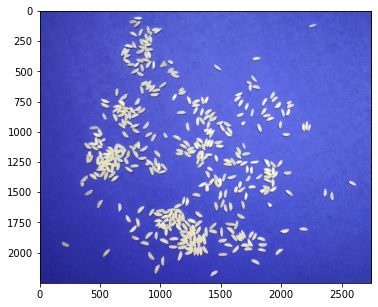

In [29]:
show(img,25,5)

#**Grey scaling and image Thresholding**

**Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application**


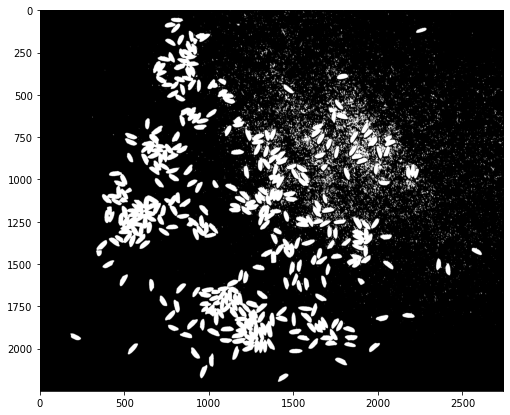

In [30]:

grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)


#**Noise Removal**

**cv2.morphologyEx -> Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images**


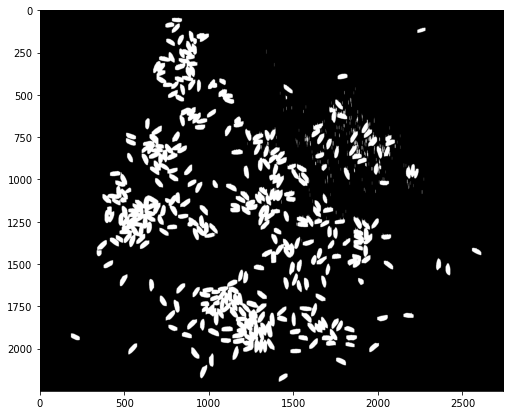

In [31]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

#**label counting**

**Copying the preprocessed image as label_image**

---

**FloodFill from opencv asks for the image, a mask, the seed pixel and the color to color the seed and the similar neighbors**

---



In [32]:

label_image = clear_image.copy()
label_count = 0
rows, cols = label_image.shape
for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image, None, (i, j), label_count)

Number of foreground objects 268297


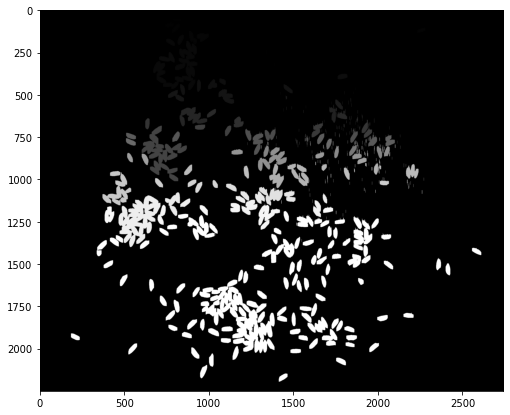

In [33]:
print("Number of foreground objects", label_count)
show(label_image)

***Number of foreground objects 268297***


#**Counting rice grains using contours method**





**findContour() function that helps in extracting the contours from the image. It works best on binary images, so we should first apply thresholding techniques**

---

**cv. drawContours function is used to draw counters**

---



In [34]:

contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 400


**Number of detected contours 400**

**cv2. imshow() method is used to display an image in a window. The window automatically fits to the image size**

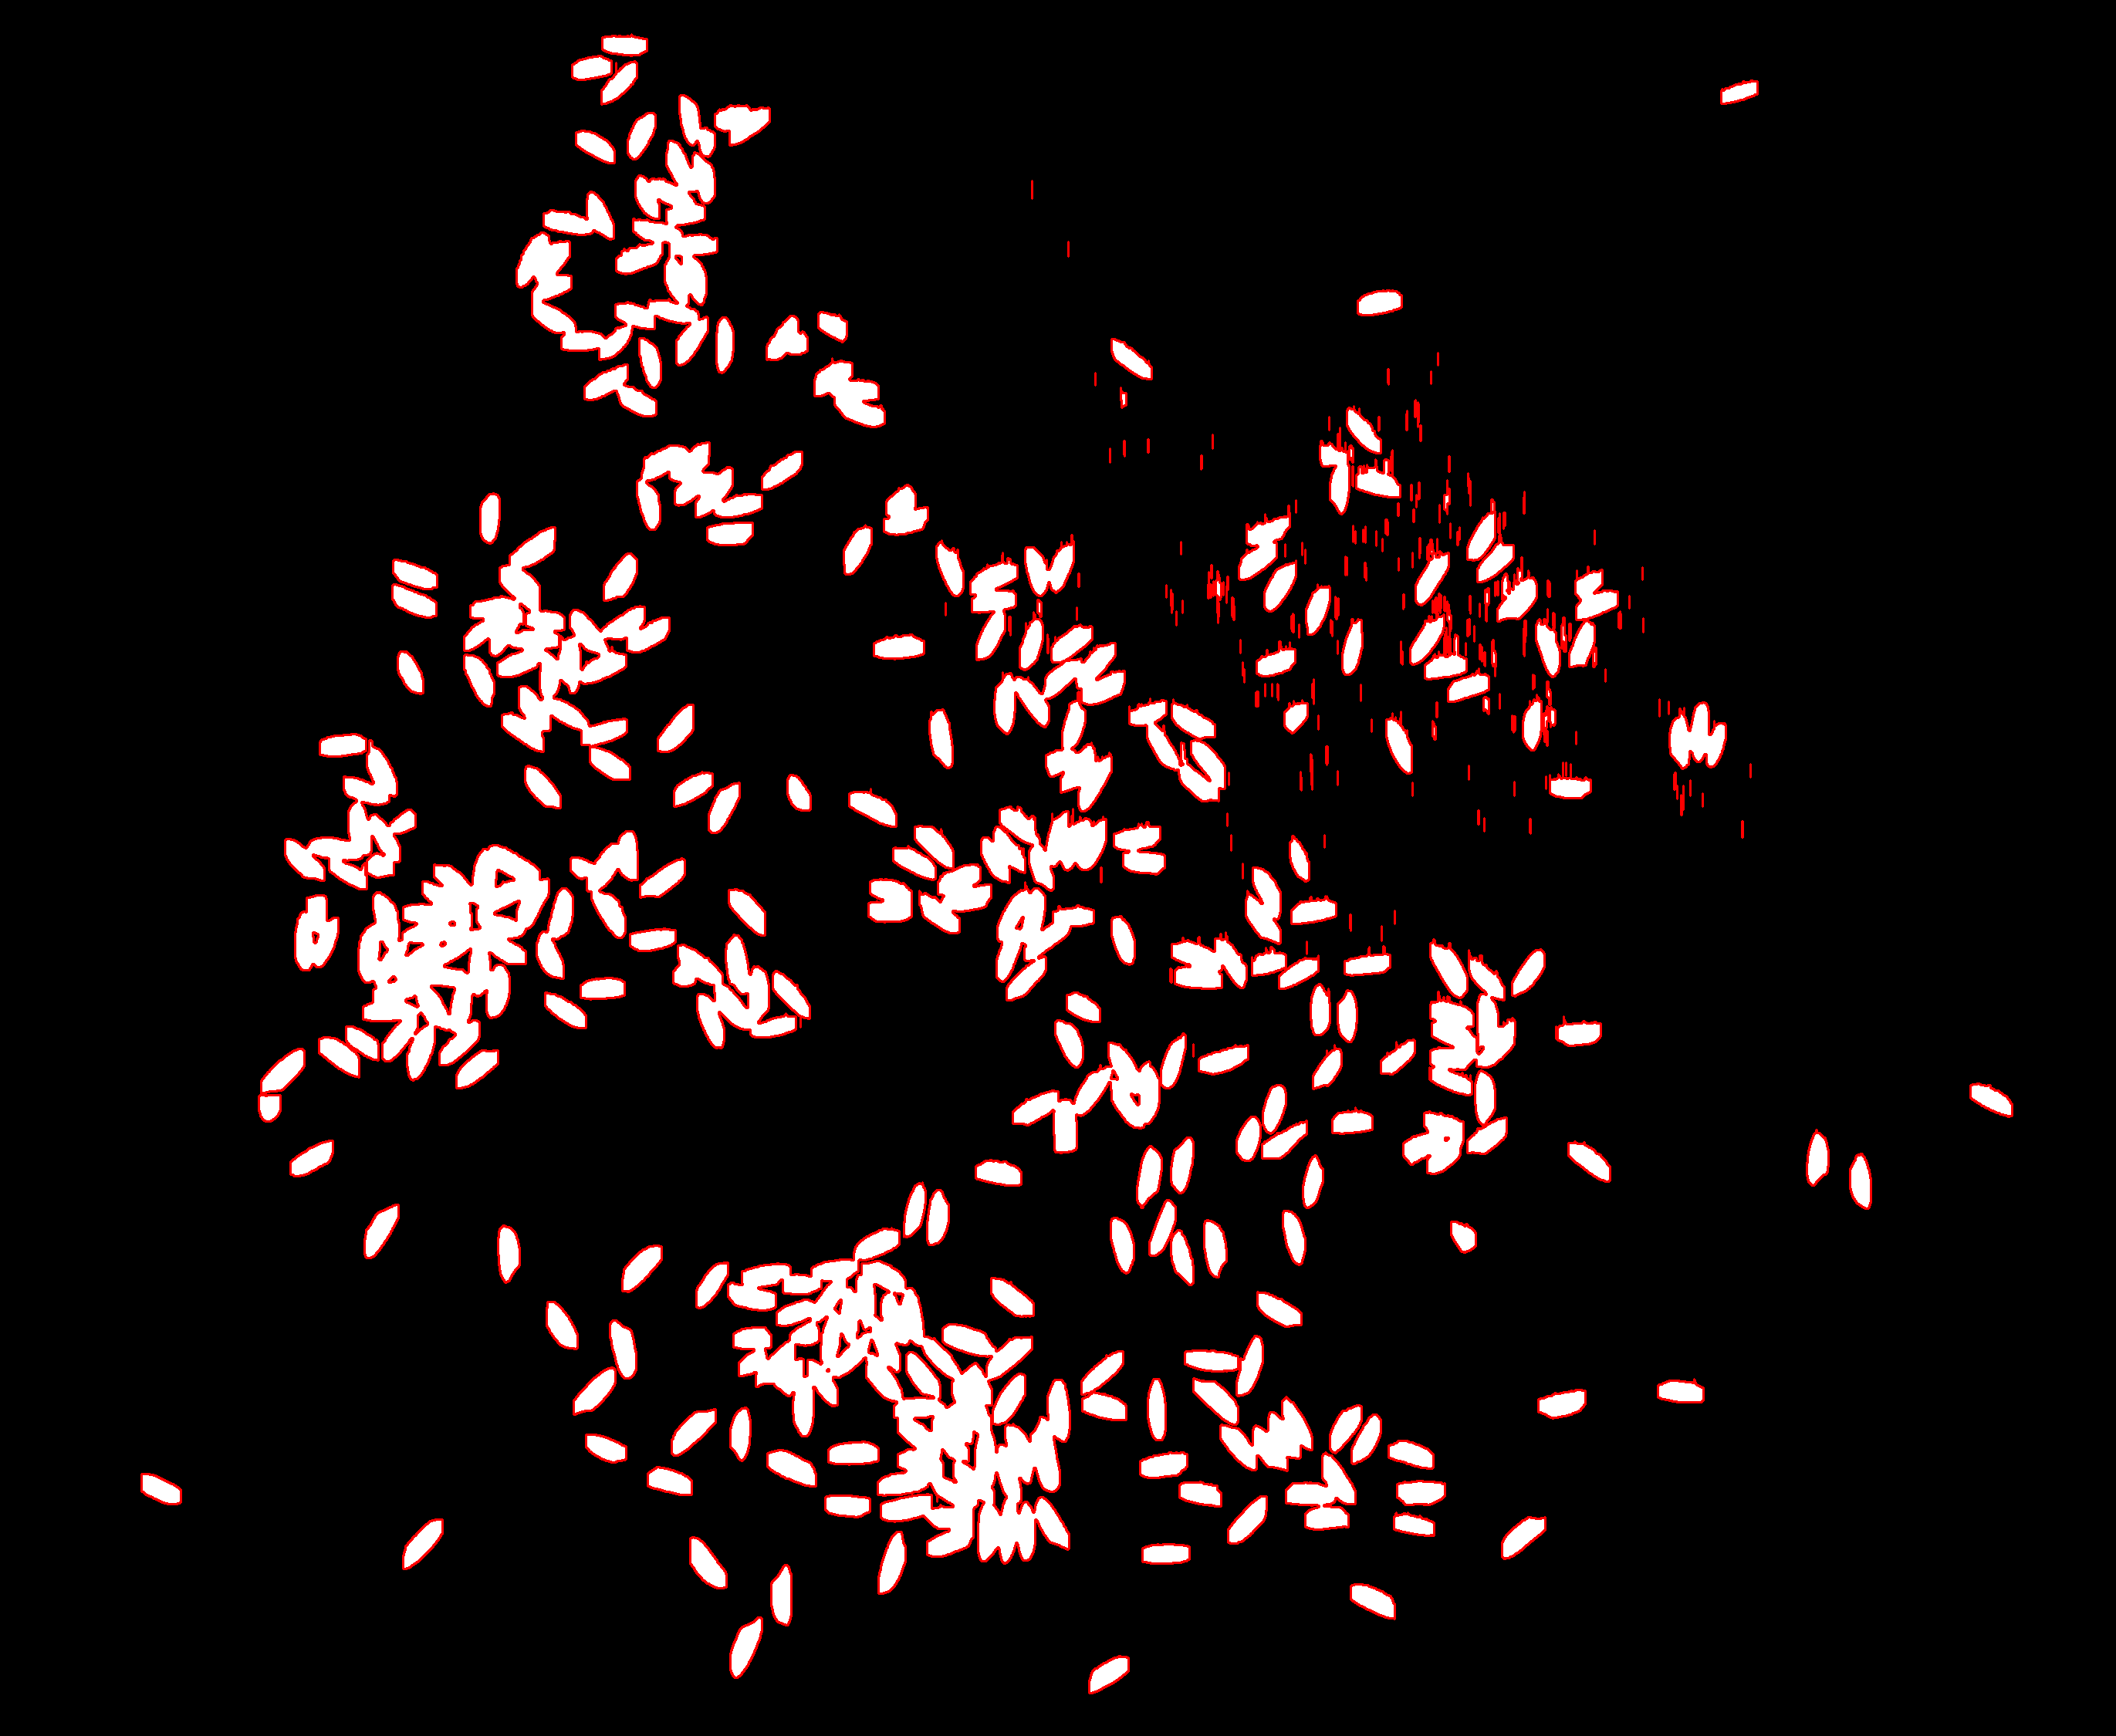

 
 Number of detected contours 400


In [35]:
cv2_imshow(output_contour)

print(" \n Number of detected contours", len(contours))

#**Solving mixup rice grain problem using watershed Algorithms**




**Watershed algorithms are used in image processing primarily for object segmentation purposes, that is, for separating different objects in an image**

In [36]:
#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

#**Counting Total Grains and Broken grains using area**

Number of Rice grains are : 359


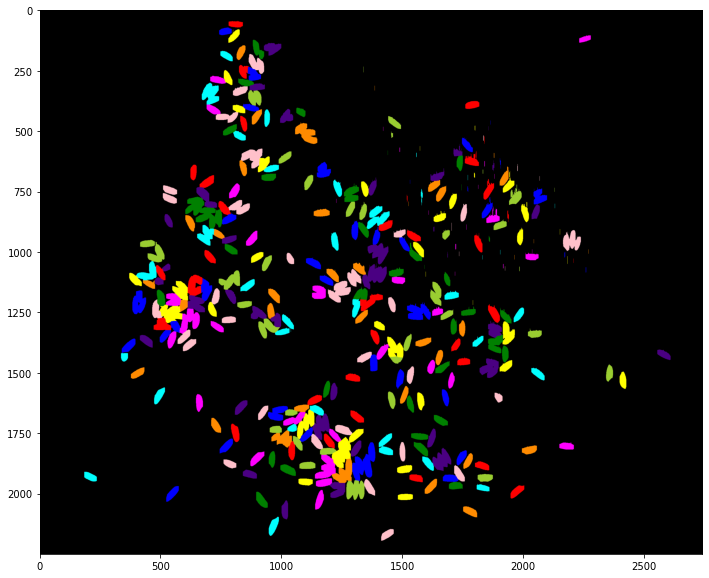

In [37]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

***Number of Rice grains are : 359***



#**Counting broken grains**

**Creating A list name count for counting the total Broken rice grains**


In [38]:

count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  214


***Total number of broken rice present in the Image is:  214***

#**Submission.csv**

In [39]:
import csv

# open the file in the write mode
f = open('/content/gdrive/MyDrive/submission.csv', 'w')

# close the file
f.close()


In [40]:
import csv  

header = ['file_name', 'Total_rice_grain','Total_broken_grains']
data = ["full_grain_1.jpg",labels.max(),len(count)]

with open('submission.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    writer.writerow(data)
